<a href="https://colab.research.google.com/github/TasnovaSUST/python-project/blob/main/Project_PP_02_08(Tasnova_Islam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: "Weather Data Analysis Tool"**


**1. Data Initialization**

**2. Importing and Validating Data**

---Allow users to:
○ Import new weather data into the application.
○ Validate the input to ensure correct formats for date and numerical fields.
--- Handle missing or incomplete records:
○ Replace missing values with averages or predefined defaults.




In [46]:
import csv
import random
from datetime import datetime, timedelta

# Function to validate and handle missing data
def validate_and_handle_missing(data, averages):
    try:
        # Validate and handle missing or invalid date
        date = datetime.strptime(data[0], '%Y-%m-%d')
    except (ValueError, TypeError):
        date = datetime(2023, 1, 1)

    # Validate numerical fields and replace missing/invalid values
    temperature = float(data[1]) if data[1] != '' else averages['temperature']
    rainfall = float(data[2]) if data[2] != '' else averages['rainfall']
    humidity = int(data[3]) if data[3] != '' else averages['humidity']
    wind_speed = int(data[4]) if data[4] != '' else averages['wind_speed']

    # Validate categorical field and replace missing/invalid values
    condition = data[5] if data[5] in ["Sunny", "Rainy", "Cloudy", "Stormy", "Windy"] else "Unknown"

    return [date.strftime('%Y-%m-%d'), temperature, rainfall, humidity, wind_speed, condition]

# Function to generate random weather data
def generate_weather_data(file_name, num_records=200):
    # Define weather conditions
    conditions = ["Sunny", "Rainy", "Cloudy", "Stormy", "Windy"]

    # Start date for the records
    start_date = datetime(2023, 1, 1)

    # Pre-calculate averages for missing data
    averages = {
        "temperature": 15.0,
        "rainfall": 50.0,
        "humidity": 60,
        "wind_speed": 10
    }

    # Open file to write
    with open(file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Write header
        writer.writerow(["Date", "Temperature (°C)", "Rainfall (mm)", "Humidity (%)", "Wind Speed (km/h)", "Condition"])

        # Generate data
        for i in range(num_records):
            date = start_date + timedelta(days=i)
            temperature = round(random.uniform(-10, 40), 1)
            rainfall = round(random.uniform(0, 200), 1)
            humidity = random.randint(10, 100)
            wind_speed = random.randint(0, 50)
            condition = random.choice(conditions)

            # Simulate some missing or invalid data
            if random.random() < 0.1:  # 10% chance of missing data
                if random.choice([True, False]):
                    temperature = ''
                else:
                    condition = ''

            # Validate and handle missing/invalid data
            row = validate_and_handle_missing(
                [date.strftime('%Y-%m-%d'), temperature, rainfall, humidity, wind_speed, condition],
                averages
            )

            # Write row
            writer.writerow(row)

# Generate a CSV file with 201 rows
generate_weather_data('weather_data.csv')
print("Weather data CSV file with validation created successfully!")


Weather data CSV file with validation created successfully!


**3. Analyzing Weather Trends**

---Calculate key statistics:
○ Average temperature, rainfall, and humidity over specific periods.
○ Days with the highest and lowest temperature or rainfall.
○ Count of sunny, rainy, or windy days in a given month.



In [47]:
import csv
from datetime import datetime
from collections import defaultdict

# Function to analyze weather trends
def analyze_weather_data(file_name):
    # Initialize variables
    total_temp = 0
    total_rainfall = 0
    total_humidity = 0
    count = 0

    # Variables to track extremes
    max_temp = float('-inf')
    min_temp = float('inf')
    max_rainfall = float('-inf')
    min_rainfall = float('inf')
    max_temp_date = None
    min_temp_date = None
    max_rainfall_date = None
    min_rainfall_date = None

    # Count of weather conditions by month
    condition_counts = defaultdict(lambda: defaultdict(int))  # {month: {condition: count}}

    with open(file_name, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            try:
                # Extract data
                date = datetime.strptime(row['Date'], '%Y-%m-%d')
                temp = float(row['Temperature (°C)'])
                rainfall = float(row['Rainfall (mm)'])
                humidity = int(row['Humidity (%)'])
                condition = row['Condition']

                # Accumulate for averages
                total_temp += temp
                total_rainfall += rainfall
                total_humidity += humidity
                count += 1

                # Update extreme values
                if temp > max_temp:
                    max_temp = temp
                    max_temp_date = date
                if temp < min_temp:
                    min_temp = temp
                    min_temp_date = date
                if rainfall > max_rainfall:
                    max_rainfall = rainfall
                    max_rainfall_date = date
                if rainfall < min_rainfall:
                    min_rainfall = rainfall
                    min_rainfall_date = date

                # Update condition counts
                condition_counts[date.month][condition] += 1
            except ValueError:
                continue  # Skip rows with invalid data

    # Calculate averages
    avg_temp = total_temp / count if count > 0 else 0
    avg_rainfall = total_rainfall / count if count > 0 else 0
    avg_humidity = total_humidity / count if count > 0 else 0

    # Print key statistics
    print("=== Weather Statistics ===")
    print(f"Average Temperature: {avg_temp:.2f}°C")
    print(f"Average Rainfall: {avg_rainfall:.2f} mm")
    print(f"Average Humidity: {avg_humidity:.2f}%")
    print(f"Highest Temperature: {max_temp:.2f}°C on {max_temp_date.strftime('%Y-%m-%d')}")
    print(f"Lowest Temperature: {min_temp:.2f}°C on {min_temp_date.strftime('%Y-%m-%d')}")
    print(f"Highest Rainfall: {max_rainfall:.2f} mm on {max_rainfall_date.strftime('%Y-%m-%d')}")
    print(f"Lowest Rainfall: {min_rainfall:.2f} mm on {min_rainfall_date.strftime('%Y-%m-%d')}")

    # Count weather conditions in a specific month
    print("\n=== Weather Conditions by Month ===")
    for month, conditions in condition_counts.items():
        print(f"Month {month}:")
        for condition, count in conditions.items():
            print(f"  {condition}: {count} days")

# Analyze the generated weather data
analyze_weather_data('weather_data.csv')


=== Weather Statistics ===
Average Temperature: 15.23°C
Average Rainfall: 93.14 mm
Average Humidity: 58.34%
Highest Temperature: 39.90°C on 2023-05-21
Lowest Temperature: -9.80°C on 2023-02-25
Highest Rainfall: 199.20 mm on 2023-03-14
Lowest Rainfall: 1.60 mm on 2023-05-06

=== Weather Conditions by Month ===
Month 1:
  Cloudy: 4 days
  Stormy: 8 days
  Rainy: 8 days
  Sunny: 8 days
  Windy: 2 days
  Unknown: 1 days
Month 2:
  Rainy: 6 days
  Sunny: 4 days
  Cloudy: 5 days
  Windy: 10 days
  Stormy: 2 days
  Unknown: 1 days
Month 3:
  Stormy: 9 days
  Windy: 5 days
  Sunny: 4 days
  Rainy: 3 days
  Cloudy: 7 days
  Unknown: 3 days
Month 4:
  Sunny: 7 days
  Windy: 9 days
  Cloudy: 5 days
  Stormy: 4 days
  Rainy: 5 days
Month 5:
  Stormy: 8 days
  Windy: 7 days
  Rainy: 6 days
  Cloudy: 5 days
  Sunny: 4 days
  Unknown: 1 days
Month 6:
  Rainy: 5 days
  Cloudy: 9 days
  Unknown: 3 days
  Stormy: 6 days
  Sunny: 5 days
  Windy: 2 days
Month 7:
  Stormy: 5 days
  Windy: 3 days
  Sunny: 2

**4. Weather Reports**

---Generate summary reports for a user-specified date range:
○ Display the average, maximum, and minimum values for temperature, rainfall,
and wind speed.
○ List days with extreme conditions, such as storms or heatwaves.





In [48]:
import csv
from datetime import datetime

def generate_summary_report(file_name, start_date, end_date):
    # Convert input date strings to datetime objects
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')

    # Initialize variables for statistics
    total_temp, total_rainfall, total_wind_speed = 0, 0, 0
    max_temp, min_temp = float('-inf'), float('inf')
    max_rainfall, min_rainfall = float('-inf'), float('inf')
    max_wind_speed, min_wind_speed = float('-inf'), float('inf')
    count = 0

    # List to store extreme condition days
    extreme_conditions = []

    with open(file_name, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            try:
                # Extract and validate data
                date = datetime.strptime(row['Date'], '%Y-%m-%d')
                if not (start_date <= date <= end_date):
                    continue  # Skip rows outside the date range

                temp = float(row['Temperature (°C)'])
                rainfall = float(row['Rainfall (mm)'])
                wind_speed = float(row['Wind Speed (km/h)'])
                condition = row['Condition']

                # Accumulate data for averages
                total_temp += temp
                total_rainfall += rainfall
                total_wind_speed += wind_speed
                count += 1

                # Track extreme values
                max_temp = max(max_temp, temp)
                min_temp = min(min_temp, temp)
                max_rainfall = max(max_rainfall, rainfall)
                min_rainfall = min(min_rainfall, rainfall)
                max_wind_speed = max(max_wind_speed, wind_speed)
                min_wind_speed = min(min_wind_speed, wind_speed)

                # Identify extreme conditions
                if condition == "Stormy" or temp > 35:  # Customize as needed
                    extreme_conditions.append((date.strftime('%Y-%m-%d'), condition, temp))
            except ValueError:
                continue  # Skip rows with invalid data

    # Calculate averages
    avg_temp = total_temp / count if count > 0 else 0
    avg_rainfall = total_rainfall / count if count > 0 else 0
    avg_wind_speed = total_wind_speed / count if count > 0 else 0

    # Display summary report
    print(f"=== Summary Report for {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')} ===")
    print(f"Average Temperature: {avg_temp:.2f}°C")
    print(f"Average Rainfall: {avg_rainfall:.2f} mm")
    print(f"Average Wind Speed: {avg_wind_speed:.2f} km/h")
    print(f"Maximum Temperature: {max_temp:.2f}°C")
    print(f"Minimum Temperature: {min_temp:.2f}°C")
    print(f"Maximum Rainfall: {max_rainfall:.2f} mm")
    print(f"Minimum Rainfall: {min_rainfall:.2f} mm")
    print(f"Maximum Wind Speed: {max_wind_speed:.2f} km/h")
    print(f"Minimum Wind Speed: {min_wind_speed:.2f} km/h")

    print("\n=== Days with Extreme Conditions ===")
    if extreme_conditions:
        for date, condition, temp in extreme_conditions:
            print(f"Date: {date}, Condition: {condition}, Temperature: {temp:.2f}°C")
    else:
        print("No extreme conditions in the specified range.")

# Example usage
# Replace 'weather_data.csv' with your CSV file path
generate_summary_report('weather_data.csv', '2023-06-01', '2023-06-30')


=== Summary Report for 2023-06-01 to 2023-06-30 ===
Average Temperature: 14.07°C
Average Rainfall: 81.63 mm
Average Wind Speed: 23.53 km/h
Maximum Temperature: 39.80°C
Minimum Temperature: -7.70°C
Maximum Rainfall: 191.60 mm
Minimum Rainfall: 3.90 mm
Maximum Wind Speed: 49.00 km/h
Minimum Wind Speed: 0.00 km/h

=== Days with Extreme Conditions ===
Date: 2023-06-05, Condition: Stormy, Temperature: 39.80°C
Date: 2023-06-08, Condition: Stormy, Temperature: 14.80°C
Date: 2023-06-10, Condition: Stormy, Temperature: 11.90°C
Date: 2023-06-11, Condition: Stormy, Temperature: -2.40°C
Date: 2023-06-12, Condition: Stormy, Temperature: 3.70°C
Date: 2023-06-25, Condition: Unknown, Temperature: 36.30°C
Date: 2023-06-27, Condition: Sunny, Temperature: 38.50°C
Date: 2023-06-29, Condition: Stormy, Temperature: -6.90°C


**5. Data Visualization**

---Visualize trends using ASCII charts:
○ Line chart for temperature over time.
○ Bar chart for daily rainfall in a month.
○ Summary table showing weather stats by month.




In [49]:
pip install matplotlib pandas

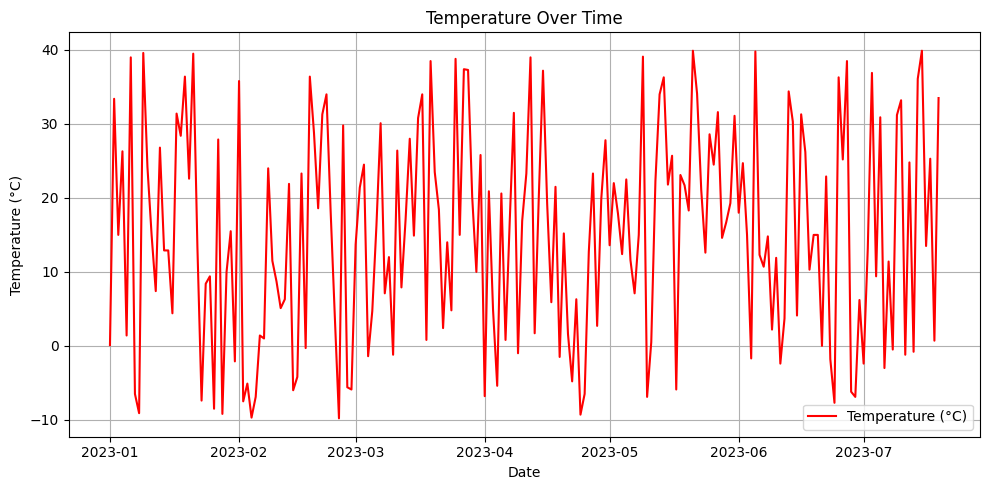

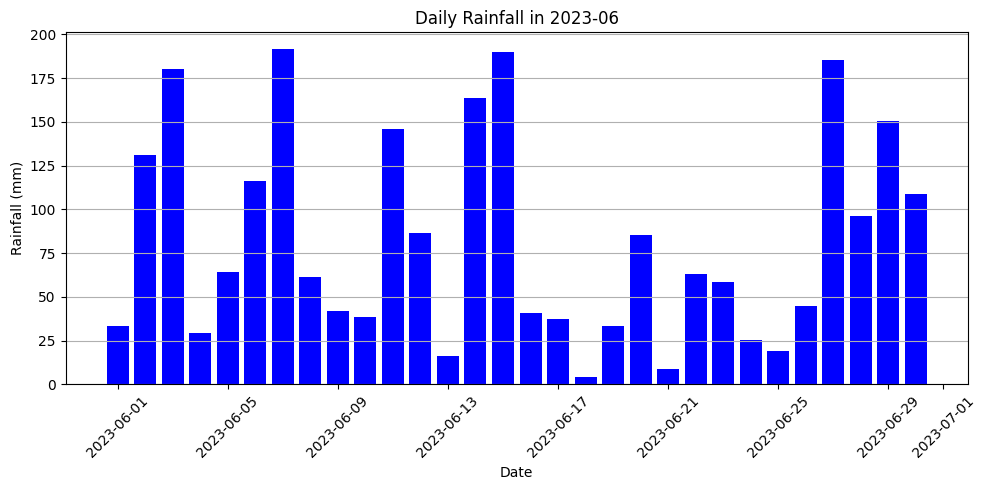

   Year  Month  Avg Temp (°C)  Max Temp (°C)  Min Temp (°C)  \
0  2023      1      14.790323           39.6           -9.2   
1  2023      2       9.967857           36.4           -9.8   
2  2023      3      18.487097           38.8           -1.4   
3  2023      4      11.820000           39.0           -9.3   
4  2023      5      20.200000           39.9           -6.9   
5  2023      6      14.070000           39.8           -7.7   
6  2023      7      17.478947           39.9           -3.0   

   Avg Rainfall (mm)  Max Rainfall (mm)  Min Rainfall (mm)  \
0         110.648387              190.6                3.1   
1          87.014286              198.3                2.7   
2         105.906452              199.2                4.4   
3         101.453333              196.7               10.7   
4          72.990323              175.2                1.6   
5          81.626667              191.6                3.9   
6          90.726316              166.7                3.1   

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the CSV file into a DataFrame
def load_weather_data(file_name):
    data = pd.read_csv(file_name, parse_dates=['Date'])
    return data

# Generate line chart for temperature over time
def plot_temperature(data):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Temperature (°C)'], label='Temperature (°C)', color='red')
    plt.title('Temperature Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate bar chart for daily rainfall in a month
def plot_rainfall(data, year, month):
    # Filter data for the given month and year
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    filtered_data = data[(data['Year'] == year) & (data['Month'] == month)]

    plt.figure(figsize=(10, 5))
    plt.bar(filtered_data['Date'], filtered_data['Rainfall (mm)'], color='blue')
    plt.title(f'Daily Rainfall in {year}-{month:02d}')
    plt.xlabel('Date')
    plt.ylabel('Rainfall (mm)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Generate summary table showing weather stats by month
def monthly_summary_table(data):
    # Extract year and month
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month

    # Group by year and month, then calculate statistics
    summary = data.groupby(['Year', 'Month']).agg({
        'Temperature (°C)': ['mean', 'max', 'min'],
        'Rainfall (mm)': ['mean', 'max', 'min'],
        'Wind Speed (km/h)': ['mean', 'max', 'min']
    }).reset_index()

    # Rename columns for better readability
    summary.columns = ['Year', 'Month',
                       'Avg Temp (°C)', 'Max Temp (°C)', 'Min Temp (°C)',
                       'Avg Rainfall (mm)', 'Max Rainfall (mm)', 'Min Rainfall (mm)',
                       'Avg Wind Speed (km/h)', 'Max Wind Speed (km/h)', 'Min Wind Speed (km/h)']

    # Display table
    print(summary)

    return summary

# Main execution
file_name = 'weather_data.csv'
data = load_weather_data(file_name)

# Plot temperature over time
plot_temperature(data)

# Plot rainfall for a specific month
plot_rainfall(data, 2023, 6)

# Generate and display monthly summary table
summary = monthly_summary_table(data)

# Optionally save the summary table to a CSV file
summary.to_csv('monthly_weather_summary.csv', index=False)
print("Monthly weather summary saved to 'monthly_weather_summary.csv'.")


**6. Advanced Features**

In [52]:
import pandas as pd
from datetime import datetime
import json
import os

# Load the CSV file into a DataFrame
def load_weather_data(file_name):
    try:
        data = pd.read_csv(file_name, parse_dates=['Date'])
        return data
    except FileNotFoundError:
        print("Error: The file was not found.")
        return None
    except pd.errors.ParserError:
        print("Error: The file could not be parsed. Please check the file format.")
        return None

# Export weather report to CSV file
def export_weather_report(data, file_name):
    try:
        data.to_csv(file_name, index=False)
        print(f"Weather report successfully exported to {file_name}.")
    except Exception as e:
        print(f"Error while exporting the file: {e}")

# Save user-defined analysis configuration to a file
def save_analysis_configuration(config, filename='analysis_config.json'):
    try:
        with open(filename, 'w') as file:
            json.dump(config, file)
        print(f"Configuration saved to {filename}.")
    except Exception as e:
        print(f"Error saving configuration: {e}")

# Load user-defined analysis configuration from a file
def load_analysis_configuration(filename='analysis_config.json'):
    if os.path.exists(filename):
        try:
            with open(filename, 'r') as file:
                config = json.load(file)
            print(f"Configuration loaded from {filename}.")
            return config
        except Exception as e:
            print(f"Error loading configuration: {e}")
            return None
    else:
        print("No saved configuration found.")
        return None

# Generate summary table showing weather stats by month
def monthly_summary_table(data):
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month

    summary = data.groupby(['Year', 'Month']).agg({
        'Temperature (°C)': ['mean', 'max', 'min'],
        'Rainfall (mm)': ['mean', 'max', 'min'],
        'Wind Speed (km/h)': ['mean', 'max', 'min']
    }).reset_index()

    summary.columns = ['Year', 'Month',
                       'Avg Temp (°C)', 'Max Temp (°C)', 'Min Temp (°C)',
                       'Avg Rainfall (mm)', 'Max Rainfall (mm)', 'Min Rainfall (mm)',
                       'Avg Wind Speed (km/h)', 'Max Wind Speed (km/h)', 'Min Wind Speed (km/h)']

    print(summary)
    return summary

# Search for weather data by date or condition
def search_weather_data(data, date=None, condition=None):
    if date:
        try:
            search_date = datetime.strptime(date, '%Y-%m-%d')
            filtered_data = data[data['Date'] == search_date]
            if not filtered_data.empty:
                print(filtered_data)
            else:
                print(f"No data found for {date}.")
        except ValueError:
            print("Invalid date format. Please use YYYY-MM-DD.")
    elif condition:
        filtered_data = data[data['Condition'] == condition]
        if not filtered_data.empty:
            print(filtered_data)
        else:
            print(f"No data found for condition: {condition}")
    else:
        print("Please provide either a date or a condition for the search.")

# Main execution
if __name__ == '__main__':
    file_name = 'weather_data.csv'
    data = load_weather_data(file_name)

    if data is not None:
        # Example usage
        summary = monthly_summary_table(data)

        # Export summary to CSV
        export_weather_report(summary, 'monthly_weather_summary.csv')

        # Save and load user-defined analysis configuration
        config = {
            'start_date': '2023-06-01',
            'end_date': '2023-06-30',
            'condition': 'Rainy'
        }
        save_analysis_configuration(config)
        loaded_config = load_analysis_configuration()

        # Search weather data
        search_weather_data(data, date='2023-06-15')
        search_weather_data(data, condition='Stormy')

   Year  Month  Avg Temp (°C)  Max Temp (°C)  Min Temp (°C)  \
0  2023      1      14.790323           39.6           -9.2   
1  2023      2       9.967857           36.4           -9.8   
2  2023      3      18.487097           38.8           -1.4   
3  2023      4      11.820000           39.0           -9.3   
4  2023      5      20.200000           39.9           -6.9   
5  2023      6      14.070000           39.8           -7.7   
6  2023      7      17.478947           39.9           -3.0   

   Avg Rainfall (mm)  Max Rainfall (mm)  Min Rainfall (mm)  \
0         110.648387              190.6                3.1   
1          87.014286              198.3                2.7   
2         105.906452              199.2                4.4   
3         101.453333              196.7               10.7   
4          72.990323              175.2                1.6   
5          81.626667              191.6                3.9   
6          90.726316              166.7                3.1   

**7. User Interface**

In [ ]:
import pandas as pd
from datetime import datetime
import os

# Function to load weather data from a CSV file
def load_weather_data(file_name):
    # Check if the file exists
    if not os.path.exists(file_name):
        print(f"Error: The file '{file_name}' was not found.")
        return None

    try:
        # Load the CSV data into a DataFrame
        data = pd.read_csv(file_name, parse_dates=['Date'])
        print(f"Weather data from '{file_name}' loaded successfully.")
        return data
    except pd.errors.ParserError:
        print("Error: The file could not be parsed. Please check the file format.")
        return None

# Function to manually add weather data
def add_weather_data(data):
    date_input = input("Enter the date (YYYY-MM-DD): ")
    try:
        date = datetime.strptime(date_input, '%Y-%m-%d')
        temp = float(input("Enter the temperature in Celsius: "))
        rainfall = float(input("Enter the rainfall in mm: "))
        humidity = int(input("Enter the humidity percentage: "))
        wind_speed = int(input("Enter the wind speed in km/h: "))
        condition = input("Enter the weather condition (Sunny, Rainy, Cloudy, Stormy, Windy): ")

        new_data = {
            'Date': [date],
            'Temperature (°C)': [temp],
            'Rainfall (mm)': [rainfall],
            'Humidity (%)': [humidity],
            'Wind Speed (km/h)': [wind_speed],
            'Condition': [condition]
        }

        new_df = pd.DataFrame(new_data)

        # Use pd.concat to add the new row to the existing data
        data = pd.concat([data, new_df], ignore_index=True)
        print("Data added successfully.")
    except ValueError as e:
        print(f"Invalid input. Error: {e}")
    return data

# Function to view statistics for a specific date or date range
def view_statistics(data, start_date=None, end_date=None):
    if start_date and end_date:
        filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    elif start_date:
        filtered_data = data[data['Date'] == start_date]
    else:
        print("Please provide a valid date or date range.")
        return

    if filtered_data.empty:
        print("No data found for the specified date or range.")
        return

    print(f"\nStatistics for {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d') if end_date else start_date.strftime('%Y-%m-%d')}:\n")
    print(filtered_data[['Date', 'Temperature (°C)', 'Rainfall (mm)', 'Humidity (%)', 'Wind Speed (km/h)', 'Condition']])
    print(f"\nAverage Temperature: {filtered_data['Temperature (°C)'].mean():.2f}°C")
    print(f"Average Rainfall: {filtered_data['Rainfall (mm)'].mean():.2f} mm")
    print(f"Average Wind Speed: {filtered_data['Wind Speed (km/h)'].mean():.2f} km/h")

# Function to generate ASCII-based visualizations (simple bar charts)
def generate_ascii_visualizations(data, type='temperature'):
    if type == 'temperature':
        print("\nTemperature Visualization (°C):")
        for date, temp in zip(data['Date'], data['Temperature (°C)']):
            print(f"{date.strftime('%Y-%m-%d')}: {'#' * int(temp)} ({temp}°C)")
    elif type == 'rainfall':
        print("\nRainfall Visualization (mm):")
        for date, rainfall in zip(data['Date'], data['Rainfall (mm)']):
            print(f"{date.strftime('%Y-%m-%d')}: {'#' * int(rainfall)} ({rainfall}mm)")

# Function to export weather data or analysis report to a CSV file
def export_to_csv(data, file_name):
    try:
        data.to_csv(file_name, index=False)
        print(f"Weather data exported to {file_name}.")
    except Exception as e:
        print(f"Error while exporting data: {e}")

# Menu-driven program
def menu():
    data = None
    while True:
        print("\n=== Weather Data Management ===")
        print("1. Load weather data from CSV")
        print("2. Add new weather data")
        print("3. View statistics for a specific date or date range")
        print("4. Generate ASCII-based visualizations")
        print("5. Export data to CSV")
        print("6. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            file_name = input("Enter the CSV file name or path: ")
            data = load_weather_data(file_name)
        elif choice == '2':
            if data is None:
                print("Please load the weather data first.")
                continue
            data = add_weather_data(data)
        elif choice == '3':
            if data is None:
                print("Please load the weather data first.")
                continue
            start_date_input = input("Enter the start date (YYYY-MM-DD): ")
            start_date = datetime.strptime(start_date_input, '%Y-%m-%d')
            end_date_input = input("Enter the end date (YYYY-MM-DD, or leave blank for a specific date): ")
            end_date = datetime.strptime(end_date_input, '%Y-%m-%d') if end_date_input else None
            view_statistics(data, start_date, end_date)
        elif choice == '4':
            if data is None:
                print("Please load the weather data first.")
                continue
            type_of_visualization = input("Enter 'temperature' for temperature chart or 'rainfall' for rainfall chart: ").lower()
            generate_ascii_visualizations(data, type=type_of_visualization)
        elif choice == '5':
            if data is None:
                print("Please load the weather data first.")
                continue
            file_name = input("Enter the CSV file name to export: ")
            export_to_csv(data, file_name)
        elif choice == '6':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please try again.")

# Run the menu-driven program
if __name__ == "__main__":
    menu()



=== Weather Data Management ===
1. Load weather data from CSV
2. Add new weather data
3. View statistics for a specific date or date range
4. Generate ASCII-based visualizations
5. Export data to CSV
6. Exit
Enter your choice: 1
Enter the CSV file name or path: /content/weather_data.csv
Weather data from '/content/weather_data.csv' loaded successfully.

=== Weather Data Management ===
1. Load weather data from CSV
2. Add new weather data
3. View statistics for a specific date or date range
4. Generate ASCII-based visualizations
5. Export data to CSV
6. Exit
Enter your choice: 2
Enter the date (YYYY-MM-DD): 2023-01-01
Enter the temperature in Celsius: 27.4
Enter the rainfall in mm: 163.1
Enter the humidity percentage: 89
Enter the wind speed in km/h: 5
Enter the weather condition (Sunny, Rainy, Cloudy, Stormy, Windy): Rainy
Data added successfully.

=== Weather Data Management ===
1. Load weather data from CSV
2. Add new weather data
3. View statistics for a specific date or date range